# BST plots

In [40]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [78]:
START_TIME="2022-12-03 12:00:00"
END_TIME=  "2022-12-04 12:00:00"

filename="BST_%s.npy"%(START_TIME)
bst=BSTs('bst') #start 11-25 11:58
try:
    D=np.load(filename+"xxx")
except:
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    D=bst.getData_percentile(tstart,tend,60*10,percentile=10) #10 min avg
    np.save(filename,D)
finally:
    print(D.shape)

Load BST bst/BST_2022-12-03-11-57-26.h5
Load BST bst/BST_2022-12-03-12-57-26.h5
Load BST bst/BST_2022-12-03-13-57-26.h5
Load BST bst/BST_2022-12-03-14-57-26.h5
Load BST bst/BST_2022-12-03-15-57-26.h5
Load BST bst/BST_2022-12-03-16-57-26.h5
Load BST bst/BST_2022-12-03-17-57-26.h5
Load BST bst/BST_2022-12-03-18-57-26.h5
Load BST bst/BST_2022-12-03-19-57-26.h5
Load BST bst/BST_2022-12-03-20-57-26.h5
Load BST bst/BST_2022-12-03-21-57-26.h5
Load BST bst/BST_2022-12-03-22-57-26.h5
Load BST bst/BST_2022-12-03-23-57-26.h5
Load BST bst/BST_2022-12-04-00-57-26.h5
Load BST bst/BST_2022-12-04-01-57-26.h5
Load BST bst/BST_2022-12-04-02-57-26.h5
Load BST bst/BST_2022-12-04-03-57-26.h5
Load BST bst/BST_2022-12-04-04-57-26.h5
Load BST bst/BST_2022-12-04-05-57-26.h5
Load BST bst/BST_2022-12-04-06-57-26.h5
Load BST bst/BST_2022-12-04-07-57-26.h5
Load BST bst/BST_2022-12-04-08-57-26.h5
Load BST bst/BST_2022-12-04-09-57-26.h5
Load BST bst/BST_2022-12-04-10-57-26.h5
Load BST bst/BST_2022-12-04-11-57-26.h5


/tmp/ipykernel_2668332/2475117439.py:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(hours,Dtime[:]/time_mask,'k')


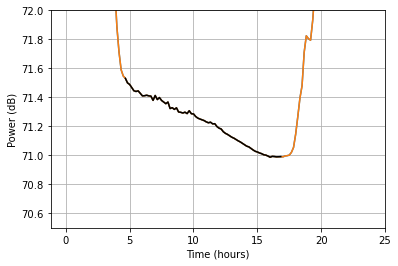

In [114]:
Dtime=P2dB(np.percentile(D[:,0,:],50,axis=1))
hours=np.arange(D.shape[0])*10/60
plt.plot(hours,Dtime[:])
plt.plot(hours,Dtime[:])
#plt.plot(hours,P2dB(np.mean(D[:,0,:],axis=1)))
#time_mask=Dtime<(np.min(Dtime)+0.5)
time_mask=(hours>4.5)*(hours<17)
plt.plot(hours,Dtime[:]/time_mask,'k')
#plt.plot(time_mask*np.min(Dtime))
plt.ylim(70.5,72)
plt.xlabel("Time (hours)")
plt.ylabel("Power (dB)")
plt.grid()

In [80]:
uv_step=0.08
X=np.arange(-1,1,uv_step)
N=len(X)
#print(N,X)
I=np.ones([len(X)])
Y=np.outer(I,X)
X=np.outer(X,I)
R=np.sqrt(X*X+Y*Y)
mask=R<1
theta=np.arccos(R*mask)/np.pi*180
phi=np.angle(X+1j*Y)/np.pi*180
print("Number of beams:",np.sum(mask))
if False:
    plt.subplot(2,2,1)
    plt.imshow(R/mask);plt.colorbar();plt.title('R');
    plt.subplot(2,2,2)
    plt.imshow(theta/mask);plt.colorbar();plt.title('theta');
    plt.subplot(2,2,3)
    plt.imshow(phi/mask,cmap='twilight');plt.colorbar();plt.title('phi');


Number of beams: 484


In [81]:
index=np.array(range(N*N))
indexC=np.compress(mask.flatten(),index)
NC=len(indexC)
thetaC=np.compress(mask.flatten(),theta.flatten())
phiC=np.compress(mask.flatten(),phi.flatten())
def makeMat(N,indexC,varC,zeros=None):
    D=np.zeros([N*N])
    D[:]=zeros
    D[indexC]=varC
    D=D.reshape([N,N])
    return D
#plt.imshow(makeMat(N,indexC,phiC))

In [82]:
PAULUS = False

In [144]:
def P2dB(X): 
    return 10*np.log10(X+1e-3)

steps = 25
y_ax = [-1+(2*step/(steps-1)) for step in range(steps)]
x_ax = [-1+(2*step/(steps-1)) for step in range(steps)]

def plot_map(data, bar=True, time_slot=0):
    plt.pcolor(x_ax, y_ax, makeMat(N,indexC,P2dB(data)),vmin=-0.2,vmax=0.6)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.title(f"{START_TIME} {(time_slot/6):4.2f} h") 
    if bar:
        plt.colorbar(label='Power dB')

In [145]:
hour_select=16
i=np.argmin(np.abs(hours-hour_select))
bstnormX=np.mean(D[i,0][:2*NC:2])
bstnormY=np.mean(D[i,0][1:2*NC:2])
print('norm=',P2dB(bstnormX),P2dB(bstnormY))

norm= 71.15947828623415 70.84646883280038


In [146]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.time import Time
import astropy.units as u
CasA = SkyCoord.from_name('Cas A')
CygA = SkyCoord.from_name('Cyg A')
#Sun = SkyCoord.from_name('Sun')
stars=[CasA,CygA]
ASTRON=EarthLocation(lat=52.811186*u.deg,lon=6.395318*u.deg,height=50*u.m);
time=Time(START_TIME) +hours*u.hour
print(time[:5])

['2022-12-03 12:00:00.000' '2022-12-03 12:10:00.000'
 '2022-12-03 12:20:00.000' '2022-12-03 12:30:00.000'
 '2022-12-03 12:40:00.000']


(144,)
(144,)


(-1.0, 1.0)

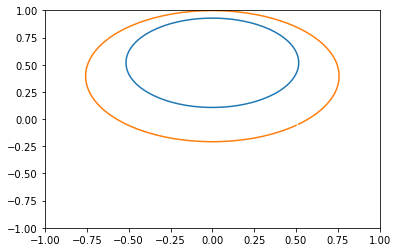

In [147]:
from astropy.coordinates import AltAz
#el=[]
#altazs=[]
XY=[]
for star in stars:
    altaz = star.transform_to(AltAz(obstime=time,location=ASTRON))
    alt=altaz.alt.value/180*np.pi
    az=altaz.az.value/180*np.pi
    #altazs.append([altaz.alt.value,altaz.az.value])
    Y=np.cos(alt)*np.cos(az)
    X=np.cos(alt)*np.sin(az)
    print(Y.shape)
    XY.append([X,Y])
    #el.append(90-np.arcsin(Y)/np.pi*180)
#XY=np.array(XY);
#print(XY.shape)
for xy in XY:
    plt.plot(xy[0],xy[1])
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.xlabel("elevation")

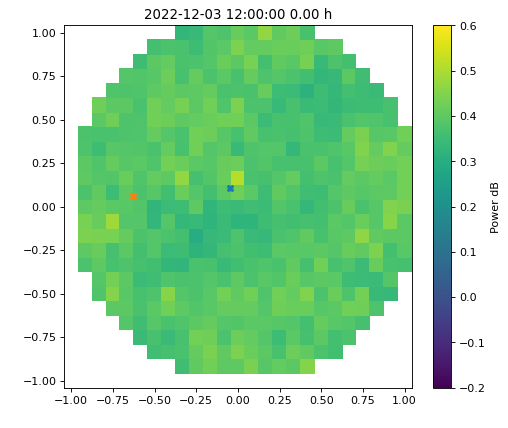

In [148]:
hour_select=6.5
i=np.argmin(np.abs(hours-hour_select))
bstX=D[i,0][:2*NC:2].copy()#/D[0,0][2*NC]
#bstnorm=np.mean(bstX)
bstX/=bstnormX #/np.mean(D[x,0][2*NC]
bstY=D[i,0][1:1+2*NC:2].copy()#/D[0,0][2*NC+1]
if PAULUS:
    plt.imshow(makeMat(N,indexC,P2dB(bstX)))
    plt.colorbar(label='Power dB')
else:
    plt.figure(figsize=(7,6), dpi=80)
    plot_map(bstX)
for xy in XY:
    plt.plot(xy[0][i],xy[1][i],'X')
plt.show()

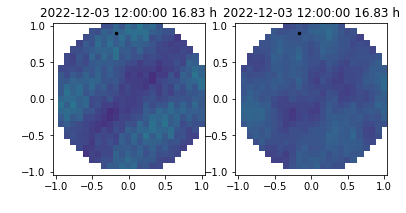

In [149]:
from time import sleep
from IPython.display import clear_output
fig_files = []
for x in range(D.shape[0]):
    if not(time_mask[x]): continue;
    clear_output(wait=True)
    bstX=D[x,0][:2*NC:2].copy()
    bstX/=bstnormX;# np.percentile(bstX,50)
    bstY=D[x,0][1:1+2*NC:2].copy()#/D[x,0][2*NC+1]    
    bstY/=bstnormY; #np.percentile(bstY,50)
    fig1=plt.subplot(1,2,1)
    if PAULUS:
        plt1=plt.imshow(makeMat(N,indexC,P2dB(bstX)),vmin=-0.2,vmax=0.4)
    else:
        plot_map(bstX, bar=False, time_slot=x) 
        fig1.set_aspect('equal')
    for xy in XY[:1]:
        plt.plot(xy[0][x],xy[1][x],'k.',markersize=5)
    fig2=plt.subplot(1,2,2)
    if PAULUS:
        plt2=plt.imshow(makeMat(N,indexC,P2dB(bstY)),vmin=-0.2,vmax=0.4)
    else:
        plot_map(bstY, bar=False, time_slot=x) 
        fig2.set_aspect('equal')
    for xy in XY[:1]:
        plt.plot(xy[0][x],xy[1][x],'k.',markersize=5)

#    plt.colorbar()
    file_name = 'map_' + str(x) + '.png'
    fig_files.append(file_name)
    plt.savefig(file_name)
    plt.show();
    sleep(0.2)

In [150]:
import imageio
with imageio.get_writer('beams_skymap_LBA.gif', mode='I') as writer:
    for filename in fig_files:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_2668332/760917888.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [151]:
!rm map_*.png

Text(0.5, 1.0, 'Beam Stati')

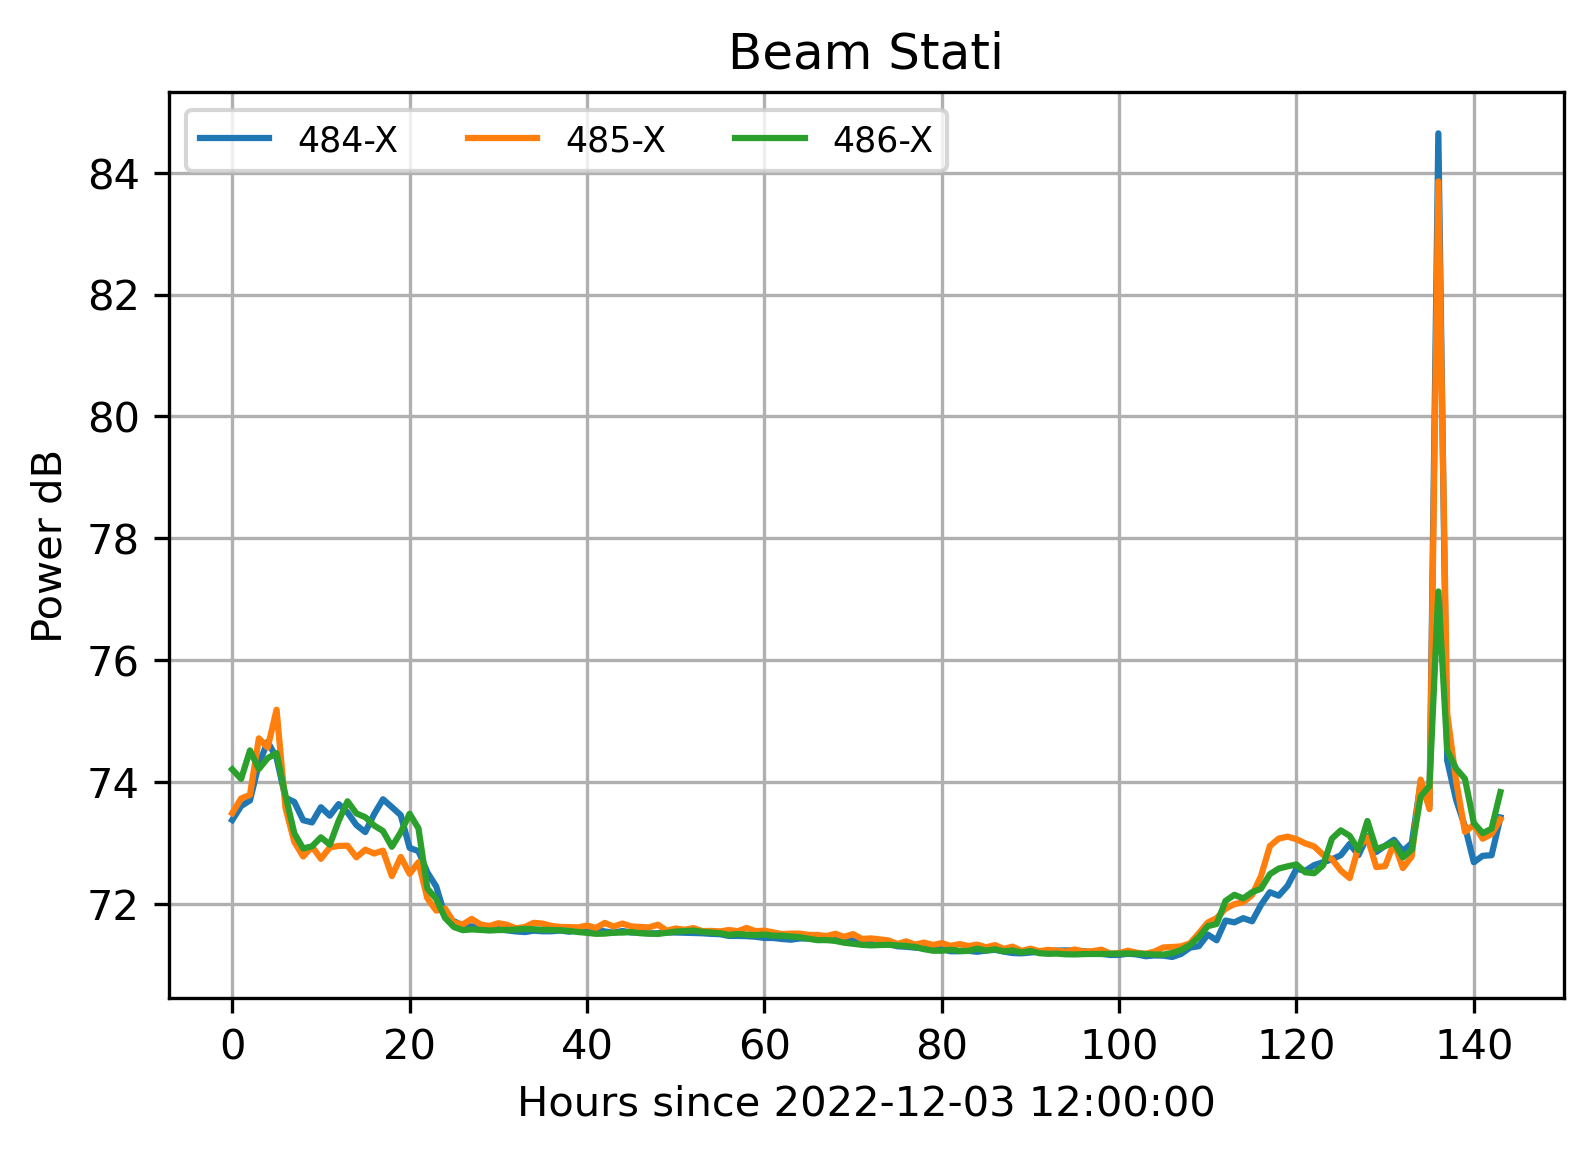

In [107]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484]),label='484-X')
plt.plot(P2dB(D[:,0,2*485]),label='485-X')
plt.plot(P2dB(D[:,0,2*486]),label='486-X')
#for x in range(488):
#    plt.plot(P2dB(D[:,0,2*x]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('Beam Stati')

(70.0, 72.0)

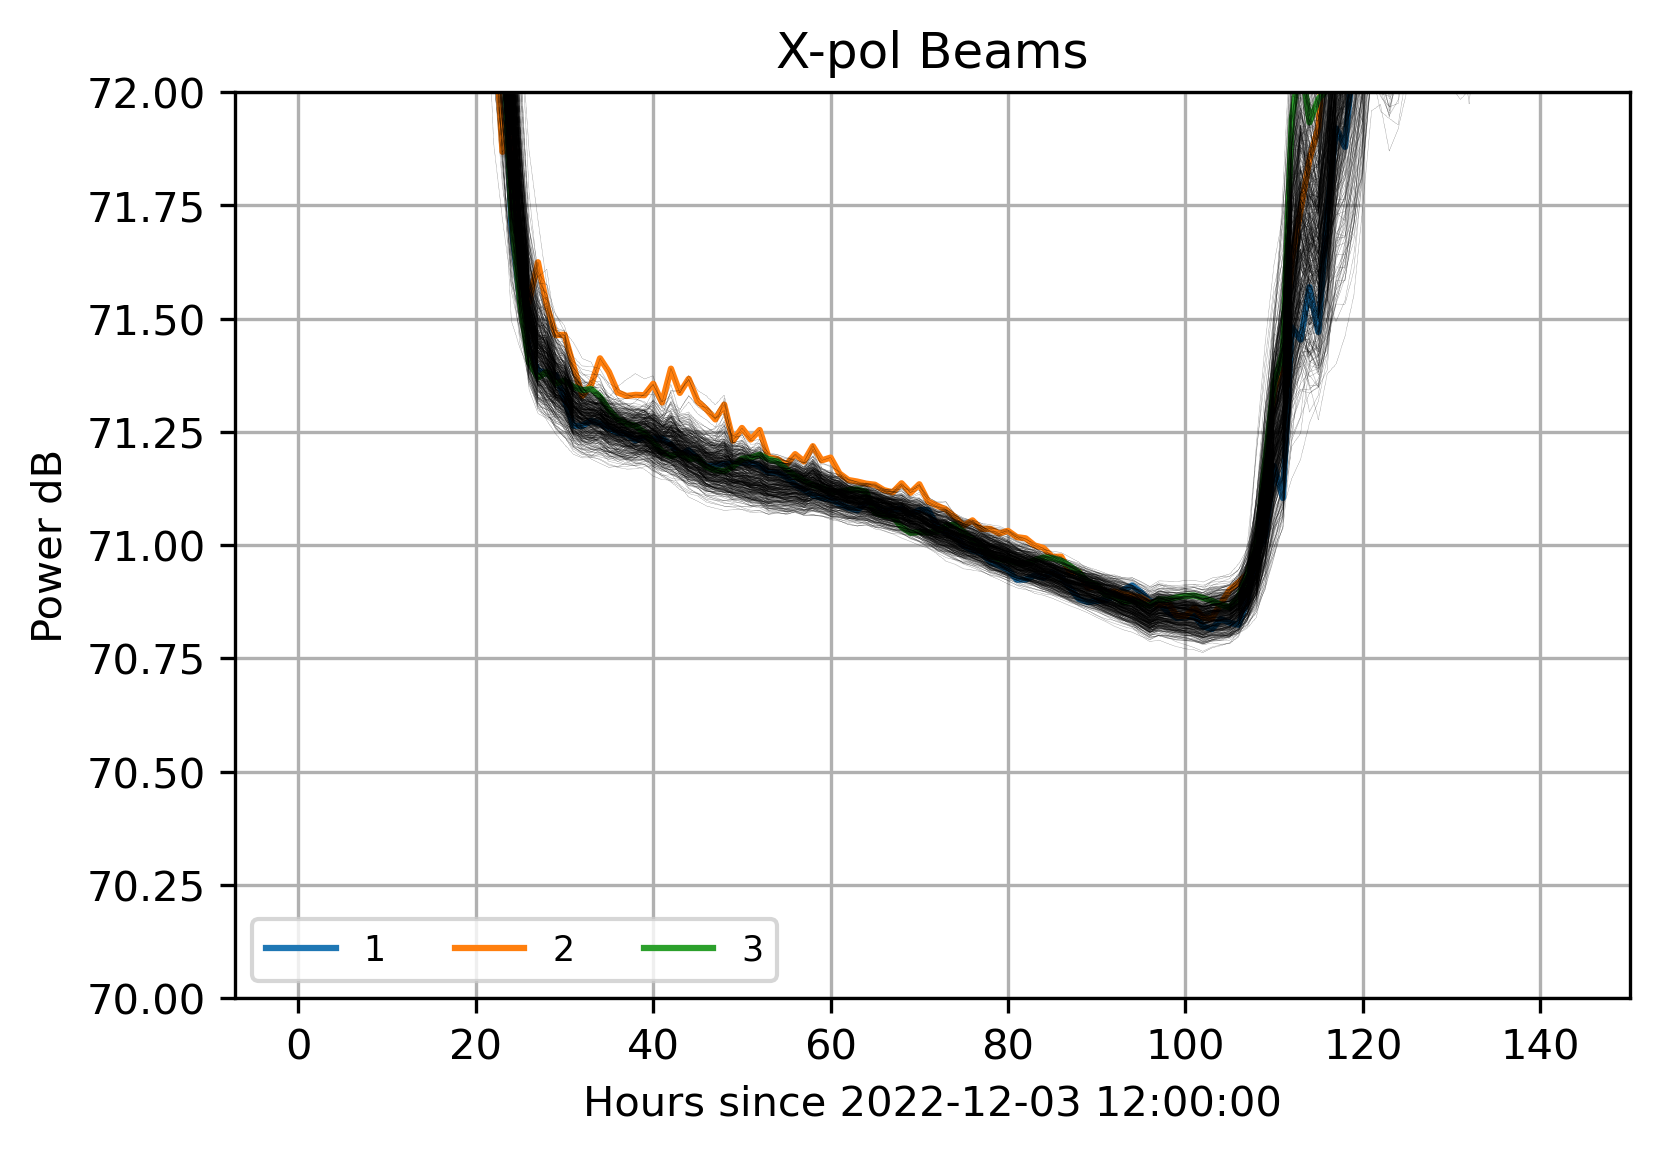

In [109]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484+1]),label='1')
plt.plot(P2dB(D[:,0,2*485+1]),label='2')
plt.plot(P2dB(D[:,0,2*486+1]),label='3')
for x in range(488):
    plt.plot(P2dB(D[:,0,2*x+1]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('X-pol Beams')
plt.ylim(70,72)

In [68]:
plt.pcolor?